In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import re
import time
import math
import tqdm
import itertools

import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

from sklearn.preprocessing import StandardScaler                                                                                                    
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# import lime
# import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
# import graphviz
# import shap

# import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/ids-intrusion-csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
%%time
df_d1 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-14-2018.csv", low_memory=False)
df_d2 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-15-2018.csv", low_memory=False)
df_d3 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-16-2018.csv", low_memory=False)
df_d4 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-20-2018.csv", low_memory=False)
df_d5 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-21-2018.csv", low_memory=False)
df_d6 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-22-2018.csv", low_memory=False)
df_d7 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-23-2018.csv", low_memory=False)
df_d8 = pd.read_csv("kaggle/input/ids-intrusion-csv/02-28-2018.csv", low_memory=False)
df_d9 = pd.read_csv("kaggle/input/ids-intrusion-csv/03-01-2018.csv", low_memory=False)
df_d10 = pd.read_csv("kaggle/input/ids-intrusion-csv/03-02-2018.csv", low_memory=False)

CPU times: total: 4min 46s
Wall time: 5min 25s


In [4]:
def numConvert(data):
    
    data = data[data['Dst Port'] != 'Dst Port']
    
    data['Dst Port'] = data['Dst Port'].astype(int)
    data['Protocol'] = data['Protocol'].astype(int)
    data['Flow Duration'] = data['Flow Duration'].astype(int)
    data['Tot Fwd Pkts'] = data['Tot Fwd Pkts'].astype(int)
    data['Tot Bwd Pkts'] = data['Tot Bwd Pkts'].astype(int)
    data['TotLen Fwd Pkts'] = data['TotLen Fwd Pkts'].astype(int)
    data['TotLen Bwd Pkts'] = data['TotLen Bwd Pkts'].astype(int)
    data['Fwd Pkt Len Max'] = data['Fwd Pkt Len Max'].astype(int)
    data['Fwd Pkt Len Min'] = data['Fwd Pkt Len Min'].astype(int)
    data['Fwd Pkt Len Mean'] = data['Fwd Pkt Len Mean'].astype(float)
    data['Fwd Pkt Len Std'] = data['Fwd Pkt Len Std'].astype(float)
    data['Bwd Pkt Len Max'] = data['Bwd Pkt Len Max'].astype(int)
    data['Bwd Pkt Len Min'] = data['Bwd Pkt Len Min'].astype(int)
    data['Bwd Pkt Len Mean'] = data['Bwd Pkt Len Mean'].astype(float)
    data['Bwd Pkt Len Std'] = data['Bwd Pkt Len Std'].astype(float)
    data['Flow Byts/s'] = data['Flow Byts/s'].astype(float)
    data['Flow Pkts/s'] = data['Flow Pkts/s'].astype(float)
    data['Flow IAT Mean'] = data['Flow IAT Mean'].astype(float)
    data['Flow IAT Std'] = data['Flow IAT Std'].astype(float)
    data['Flow IAT Max'] = data['Flow IAT Max'].astype(int)
    data['Flow IAT Min'] = data['Flow IAT Min'].astype(int)
    data['Fwd IAT Tot'] = data['Fwd IAT Tot'].astype(int)
    data['Fwd IAT Mean'] = data['Fwd IAT Mean'].astype(float)
    data['Fwd IAT Std'] = data['Fwd IAT Std'].astype(float)
    data['Fwd IAT Max'] = data['Fwd IAT Max'].astype(int)
    data['Fwd IAT Min'] = data['Fwd IAT Min'].astype(int)
    data['Bwd IAT Tot'] = data['Bwd IAT Tot'].astype(int)
    data['Bwd IAT Mean'] = data['Bwd IAT Mean'].astype(float)
    data['Bwd IAT Std'] = data['Bwd IAT Std'].astype(float)
    data['Bwd IAT Max'] = data['Bwd IAT Max'].astype(int)
    data['Bwd IAT Min'] = data['Bwd IAT Min'].astype(int)
    data['Fwd PSH Flags'] = data['Fwd PSH Flags'].astype(int)
    data['Bwd PSH Flags'] = data['Bwd PSH Flags'].astype(int)
    data['Fwd URG Flags'] = data['Fwd URG Flags'].astype(int)
    data['Bwd URG Flags'] = data['Bwd URG Flags'].astype(int)
    data['Fwd Header Len'] = data['Fwd Header Len'].astype(int)
    data['Bwd Header Len'] = data['Bwd Header Len'].astype(int)
    data['Fwd Pkts/s'] = data['Fwd Pkts/s'].astype(float)
    data['Bwd Pkts/s'] = data['Bwd Pkts/s'].astype(float)
    data['Pkt Len Min'] = data['Pkt Len Min'].astype(int)
    data['Pkt Len Max'] = data['Pkt Len Max'].astype(int)
    data['Pkt Len Mean'] = data['Pkt Len Mean'].astype(float)
    data['Pkt Len Std'] = data['Pkt Len Std'].astype(float)
    data['Pkt Len Var'] = data['Pkt Len Var'].astype(float)
    data['FIN Flag Cnt'] = data['FIN Flag Cnt'].astype(int)
    data['SYN Flag Cnt'] = data['SYN Flag Cnt'].astype(int)
    data['RST Flag Cnt'] = data['RST Flag Cnt'].astype(int)
    data['PSH Flag Cnt'] = data['PSH Flag Cnt'].astype(int)
    data['ACK Flag Cnt'] = data['ACK Flag Cnt'].astype(int)
    data['URG Flag Cnt'] = data['URG Flag Cnt'].astype(int)
    data['CWE Flag Count'] = data['CWE Flag Count'].astype(int)
    data['ECE Flag Cnt'] = data['ECE Flag Cnt'].astype(int)
    data['Down/Up Ratio'] = data['Down/Up Ratio'].astype(int)
    data['Pkt Size Avg'] = data['Pkt Size Avg'].astype(float)
    data['Fwd Seg Size Avg'] = data['Fwd Seg Size Avg'].astype(float)
    data['Bwd Seg Size Avg'] = data['Bwd Seg Size Avg'].astype(float)
    data['Fwd Byts/b Avg'] = data['Fwd Byts/b Avg'].astype(int)
    data['Fwd Pkts/b Avg'] = data['Fwd Pkts/b Avg'].astype(int)
    data['Fwd Blk Rate Avg'] = data['Fwd Blk Rate Avg'].astype(int)
    data['Bwd Byts/b Avg'] = data['Bwd Byts/b Avg'].astype(int)
    data['Bwd Pkts/b Avg'] = data['Bwd Pkts/b Avg'].astype(int)
    data['Bwd Blk Rate Avg'] = data['Bwd Blk Rate Avg'].astype(int)
    data['Subflow Fwd Pkts'] = data['Subflow Fwd Pkts'].astype(int)
    data['Subflow Fwd Byts'] = data['Subflow Fwd Byts'].astype(int)
    data['Subflow Bwd Pkts'] = data['Subflow Bwd Pkts'].astype(int)
    data['Subflow Bwd Byts'] = data['Subflow Bwd Byts'].astype(int)
    data['Init Fwd Win Byts'] = data['Init Fwd Win Byts'].astype(int)
    data['Init Bwd Win Byts'] = data['Init Bwd Win Byts'].astype(int)
    data['Fwd Act Data Pkts'] = data['Fwd Act Data Pkts'].astype(int)
    data['Fwd Seg Size Min'] = data['Fwd Seg Size Min'].astype(int)
    data['Active Mean'] = data['Active Mean'].astype(float)
    data['Active Std'] = data['Active Std'].astype(float)
    data['Active Max'] = data['Active Max'].astype(int)
    data['Active Min'] = data['Active Min'].astype(int)
    data['Idle Mean'] = data['Idle Mean'].astype(float)
    data['Idle Std'] = data['Idle Std'].astype(float)
    data['Idle Max'] = data['Idle Max'].astype(int)
    data['Idle Min'] = data['Idle Min'].astype(int)
    
    return data

In [5]:
%%time
df_d1 = numConvert(df_d1)
df_d2 = numConvert(df_d2)
df_d3 = numConvert(df_d3)
df_d4 = numConvert(df_d4)
df_d5 = numConvert(df_d5)
df_d6 = numConvert(df_d6)
df_d7 = numConvert(df_d7)
df_d8 = numConvert(df_d8)
df_d9 = numConvert(df_d9)
df_d10 = numConvert(df_d10)

CPU times: total: 53.5 s
Wall time: 1min 21s


In [6]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
    print(df)
    print(df.info())
    print(df['Label'].value_counts())
    print("\n\n\n")

In [7]:
%%time
dataProperties(df_d1, "Day 1")
dataProperties(df_d2, "Day 2")
dataProperties(df_d3, "Day 3")
dataProperties(df_d4, "Day 4")
dataProperties(df_d5, "Day 5")
dataProperties(df_d6, "Day 6")
dataProperties(df_d7, "Day 7")
dataProperties(df_d8, "Day 8")
dataProperties(df_d9, "Day 9")
dataProperties(df_d10, "Day 10")

Day 1
Number of rows (Samples):  1048575
Number of columns (Features):  80
         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02

In [8]:
print (df_d1.shape)

df_d1 = df_d1.replace(["Infinity", "infinity"], np.inf)
df_d1 = df_d1.replace([np.inf, -np.inf], np.nan)

df_d1.dropna(inplace=True)

print (df_d1.shape)

(1048575, 80)
(1044751, 80)


In [9]:
def dropInfiniteNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)
    
    return df

In [10]:
%%time
df_d1 = dropInfiniteNull(df_d1)
df_d2 = dropInfiniteNull(df_d2)
df_d3 = dropInfiniteNull(df_d3)
df_d4 = dropInfiniteNull(df_d4)
df_d5 = dropInfiniteNull(df_d5)
df_d6 = dropInfiniteNull(df_d6)
df_d7 = dropInfiniteNull(df_d7)
df_d8 = dropInfiniteNull(df_d8)
df_d9 = dropInfiniteNull(df_d9)
df_d10 = dropInfiniteNull(df_d10)

(1044751, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 84)
(7889295, 84)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)
CPU times: total: 55.4 s
Wall time: 1min 11s


In [11]:
def dropTimestamp(df): 
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [12]:
%%time
df_d1 = dropTimestamp(df_d1)
df_d2 = dropTimestamp(df_d2)
df_d3 = dropTimestamp(df_d3)
df_d4 = dropTimestamp(df_d4)
df_d5 = dropTimestamp(df_d5)
df_d6 = dropTimestamp(df_d6)
df_d7 = dropTimestamp(df_d7)
df_d8 = dropTimestamp(df_d8)
df_d9 = dropTimestamp(df_d9)
df_d10 = dropTimestamp(df_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 83)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)
CPU times: total: 24.5 s
Wall time: 34.5 s


In [13]:
%%time
def classifyLabel(data):
    # encode the target feature
    data['Label'] = data['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(data['Label'].unique())
    print(data['Label'].value_counts())
    return data

CPU times: total: 0 ns
Wall time: 22.2 μs


In [14]:
%%time

df_d1 = classifyLabel(df_d1)
df_d2 = classifyLabel(df_d2)
df_d3 = classifyLabel(df_d3)
df_d4 = classifyLabel(df_d4)
df_d5 = classifyLabel(df_d5)
df_d6 = classifyLabel(df_d6)
df_d7 = classifyLabel(df_d7)
df_d8 = classifyLabel(df_d8)
df_d9 = classifyLabel(df_d9)
df_d10 = classifyLabel(df_d10)

['Benign' 'Malicious']
Label
Benign       663808
Malicious    380943
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       988050
Malicious     52498
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Malicious    601802
Benign       446772
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       7313104
Malicious     576191
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Malicious    687742
Benign       360833
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       1042603
Malicious        362
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       1042301
Malicious        566
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       538666
Malicious     68236
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       235778
Malicious     92403
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       758334
Malicious    286191
Name: count, dtype: int64
CPU times: total: 3.67 s
Wall time: 3.71 s


In [15]:
%%time

from imblearn.under_sampling import RandomUnderSampler

def balanceData(df):
    
    print (df.shape)
    print(df['Label'].value_counts())

    # split data into features and target
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    # applying oversampling
    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y) 

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())
    
    return df

CPU times: total: 1.06 s
Wall time: 2.69 s


In [16]:
%%time
df_d1 = balanceData(df_d1)
df_d2 = balanceData(df_d2)
df_d3 = balanceData(df_d3)
df_d4 = balanceData(df_d4)
df_d5 = balanceData(df_d5)
df_d6 = balanceData(df_d6)
df_d7 = balanceData(df_d7)
df_d8 = balanceData(df_d8)
df_d9 = balanceData(df_d9)
df_d10 = balanceData(df_d10)

(1044751, 79)
Label
Benign       663808
Malicious    380943
Name: count, dtype: int64
(761886, 79)
Label
Benign       380943
Malicious    380943
Name: count, dtype: int64
(1040548, 79)
Label
Benign       988050
Malicious     52498
Name: count, dtype: int64
(104996, 79)
Label
Benign       52498
Malicious    52498
Name: count, dtype: int64
(1048574, 79)
Label
Malicious    601802
Benign       446772
Name: count, dtype: int64
(893544, 79)
Label
Benign       446772
Malicious    446772
Name: count, dtype: int64
(7889295, 83)
Label
Benign       7313104
Malicious     576191
Name: count, dtype: int64
(1152382, 83)
Label
Benign       576191
Malicious    576191
Name: count, dtype: int64
(1048575, 79)
Label
Malicious    687742
Benign       360833
Name: count, dtype: int64
(721666, 79)
Label
Benign       360833
Malicious    360833
Name: count, dtype: int64
(1042965, 79)
Label
Benign       1042603
Malicious        362
Name: count, dtype: int64
(724, 79)
Label
Benign       362
Malicious    362
Name: 

In [17]:
%%time
df = pd.concat([df_d1, df_d2], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d1, df_d2

df = pd.concat([df, df_d3], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d3

df = pd.concat([df, df_d4], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d4

df = pd.concat([df, df_d5], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d5

df = pd.concat([df, df_d6], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d6

df = pd.concat([df, df_d7], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d7

df = pd.concat([df, df_d8], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d8

df = pd.concat([df, df_d9], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d9

df = pd.concat([df, df_d10], axis=0)
df.reset_index(drop=True, inplace=True)
del df_d10

CPU times: total: 6.78 s
Wall time: 7.44 s


In [18]:
df['Label'].value_counts()

Label
Benign       2264995
Malicious    2264995
Name: count, dtype: int64

In [19]:
%%time
# drop the constant columns (which varience is 0)
variances = df.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df = df.drop(constant_columns, axis=1)

print(constant_columns)
print (df.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(4529990, 75)
CPU times: total: 4.55 s
Wall time: 4.61 s


In [20]:
%%time
duplicates = set()
for i in range(0, len(df.columns)):
    col1 = df.columns[i]
    for j in range(i+1, len(df.columns)):
        col2 = df.columns[j]
        if(df[col1].equals(df[col2])):
            duplicates.add(col2)

print (duplicates)
df.drop(duplicates, axis=1, inplace=True)
print (df.shape)

{'Subflow Fwd Byts', 'SYN Flag Cnt', 'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'CWE Flag Count'}
(4529990, 70)
CPU times: total: 7.92 s
Wall time: 8.01 s


In [21]:
%%time
# encode the target feature
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)
print(df['Label'].unique())

[0 1]
CPU times: total: 1.16 s
Wall time: 1.17 s


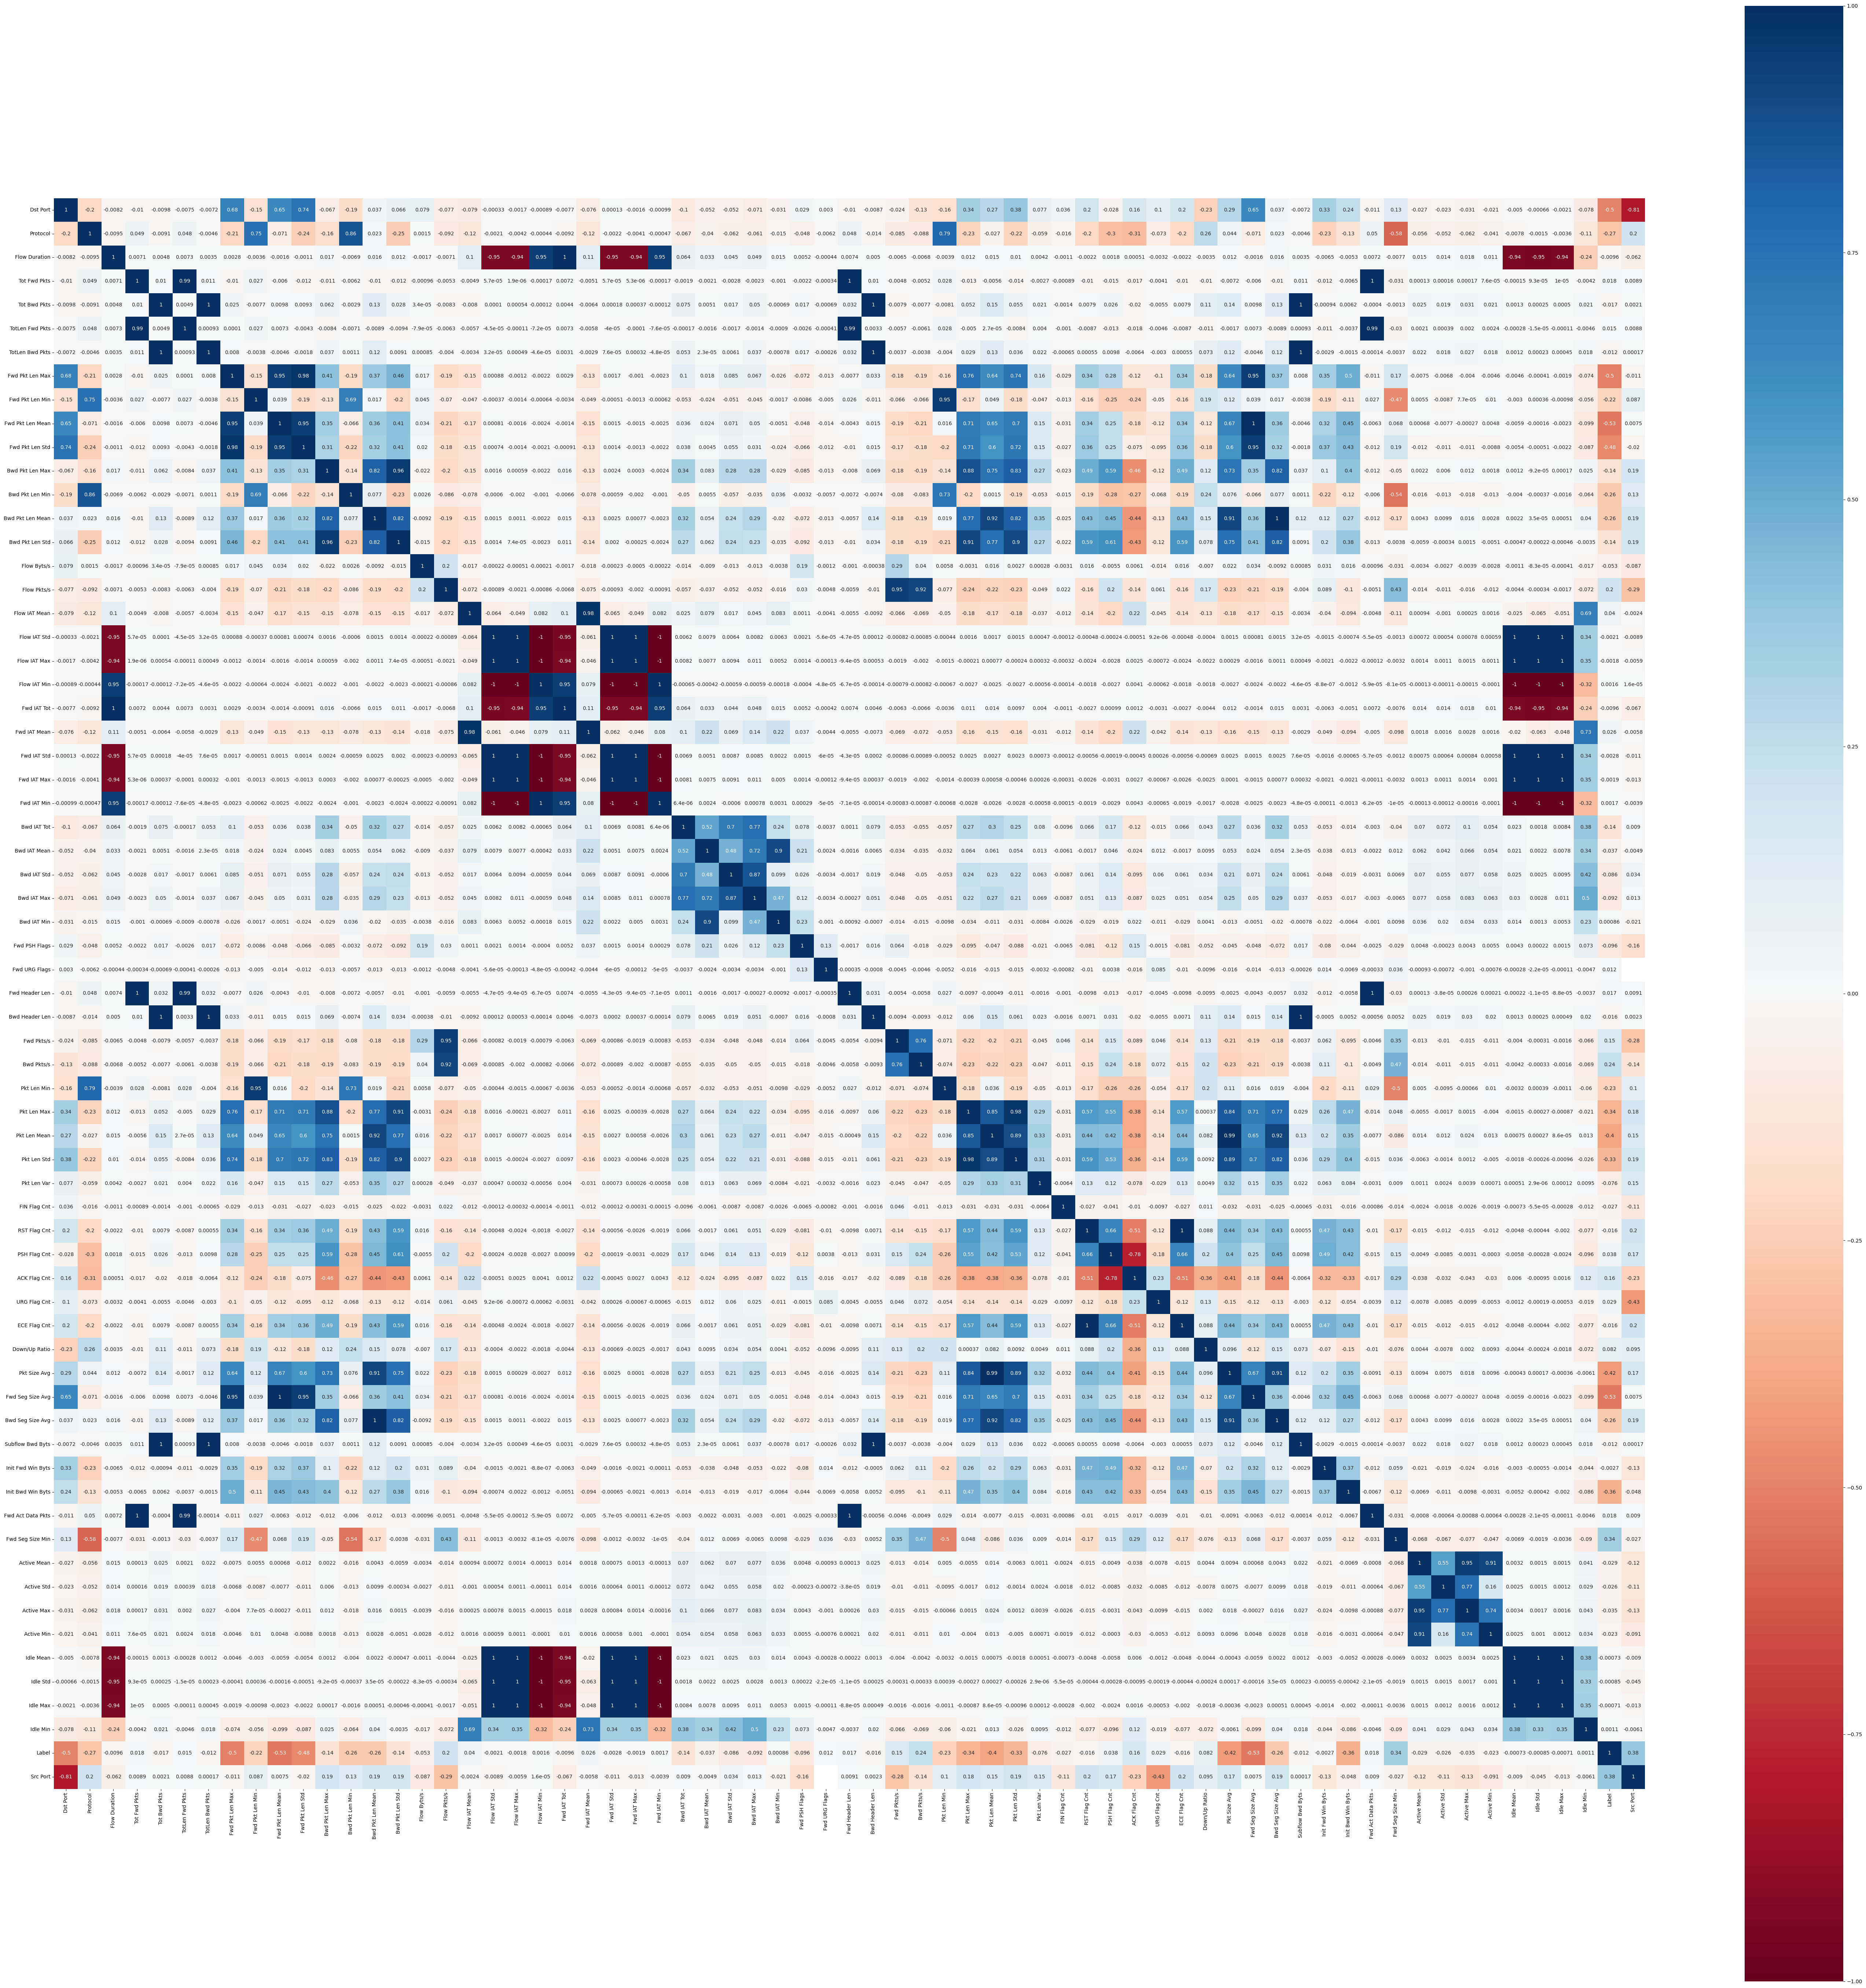

CPU times: total: 46.3 s
Wall time: 47.5 s


In [22]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [23]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Flow IAT Mean', 'Fwd IAT Max', 'Pkt Len Max', 'Pkt Len Mean', 'Flow IAT Max', 'Fwd IAT Tot', 'Active Mean', 'Flow Pkts/s', 'Tot Fwd Pkts', 'Flow Duration', 'Bwd Header Len', 'TotLen Bwd Pkts', 'Fwd IAT Std', 'Bwd Pkt Len Max', 'TotLen Fwd Pkts', 'Idle Std', 'Flow IAT Min', 'Bwd IAT Mean', 'RST Flag Cnt', 'Idle Mean', 'Bwd Pkt Len Std', 'Fwd Pkt Len Min', 'Tot Bwd Pkts', 'Pkt Size Avg', 'Flow IAT Std', 'Fwd Header Len', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Fwd Pkt Len Max'}
30
CPU times: total: 62.5 ms
Wall time: 49.3 ms


In [24]:
%%time
df.drop(correlated_col, axis=1, inplace=True)
print (df.shape)

(4529990, 40)
CPU times: total: 688 ms
Wall time: 701 ms


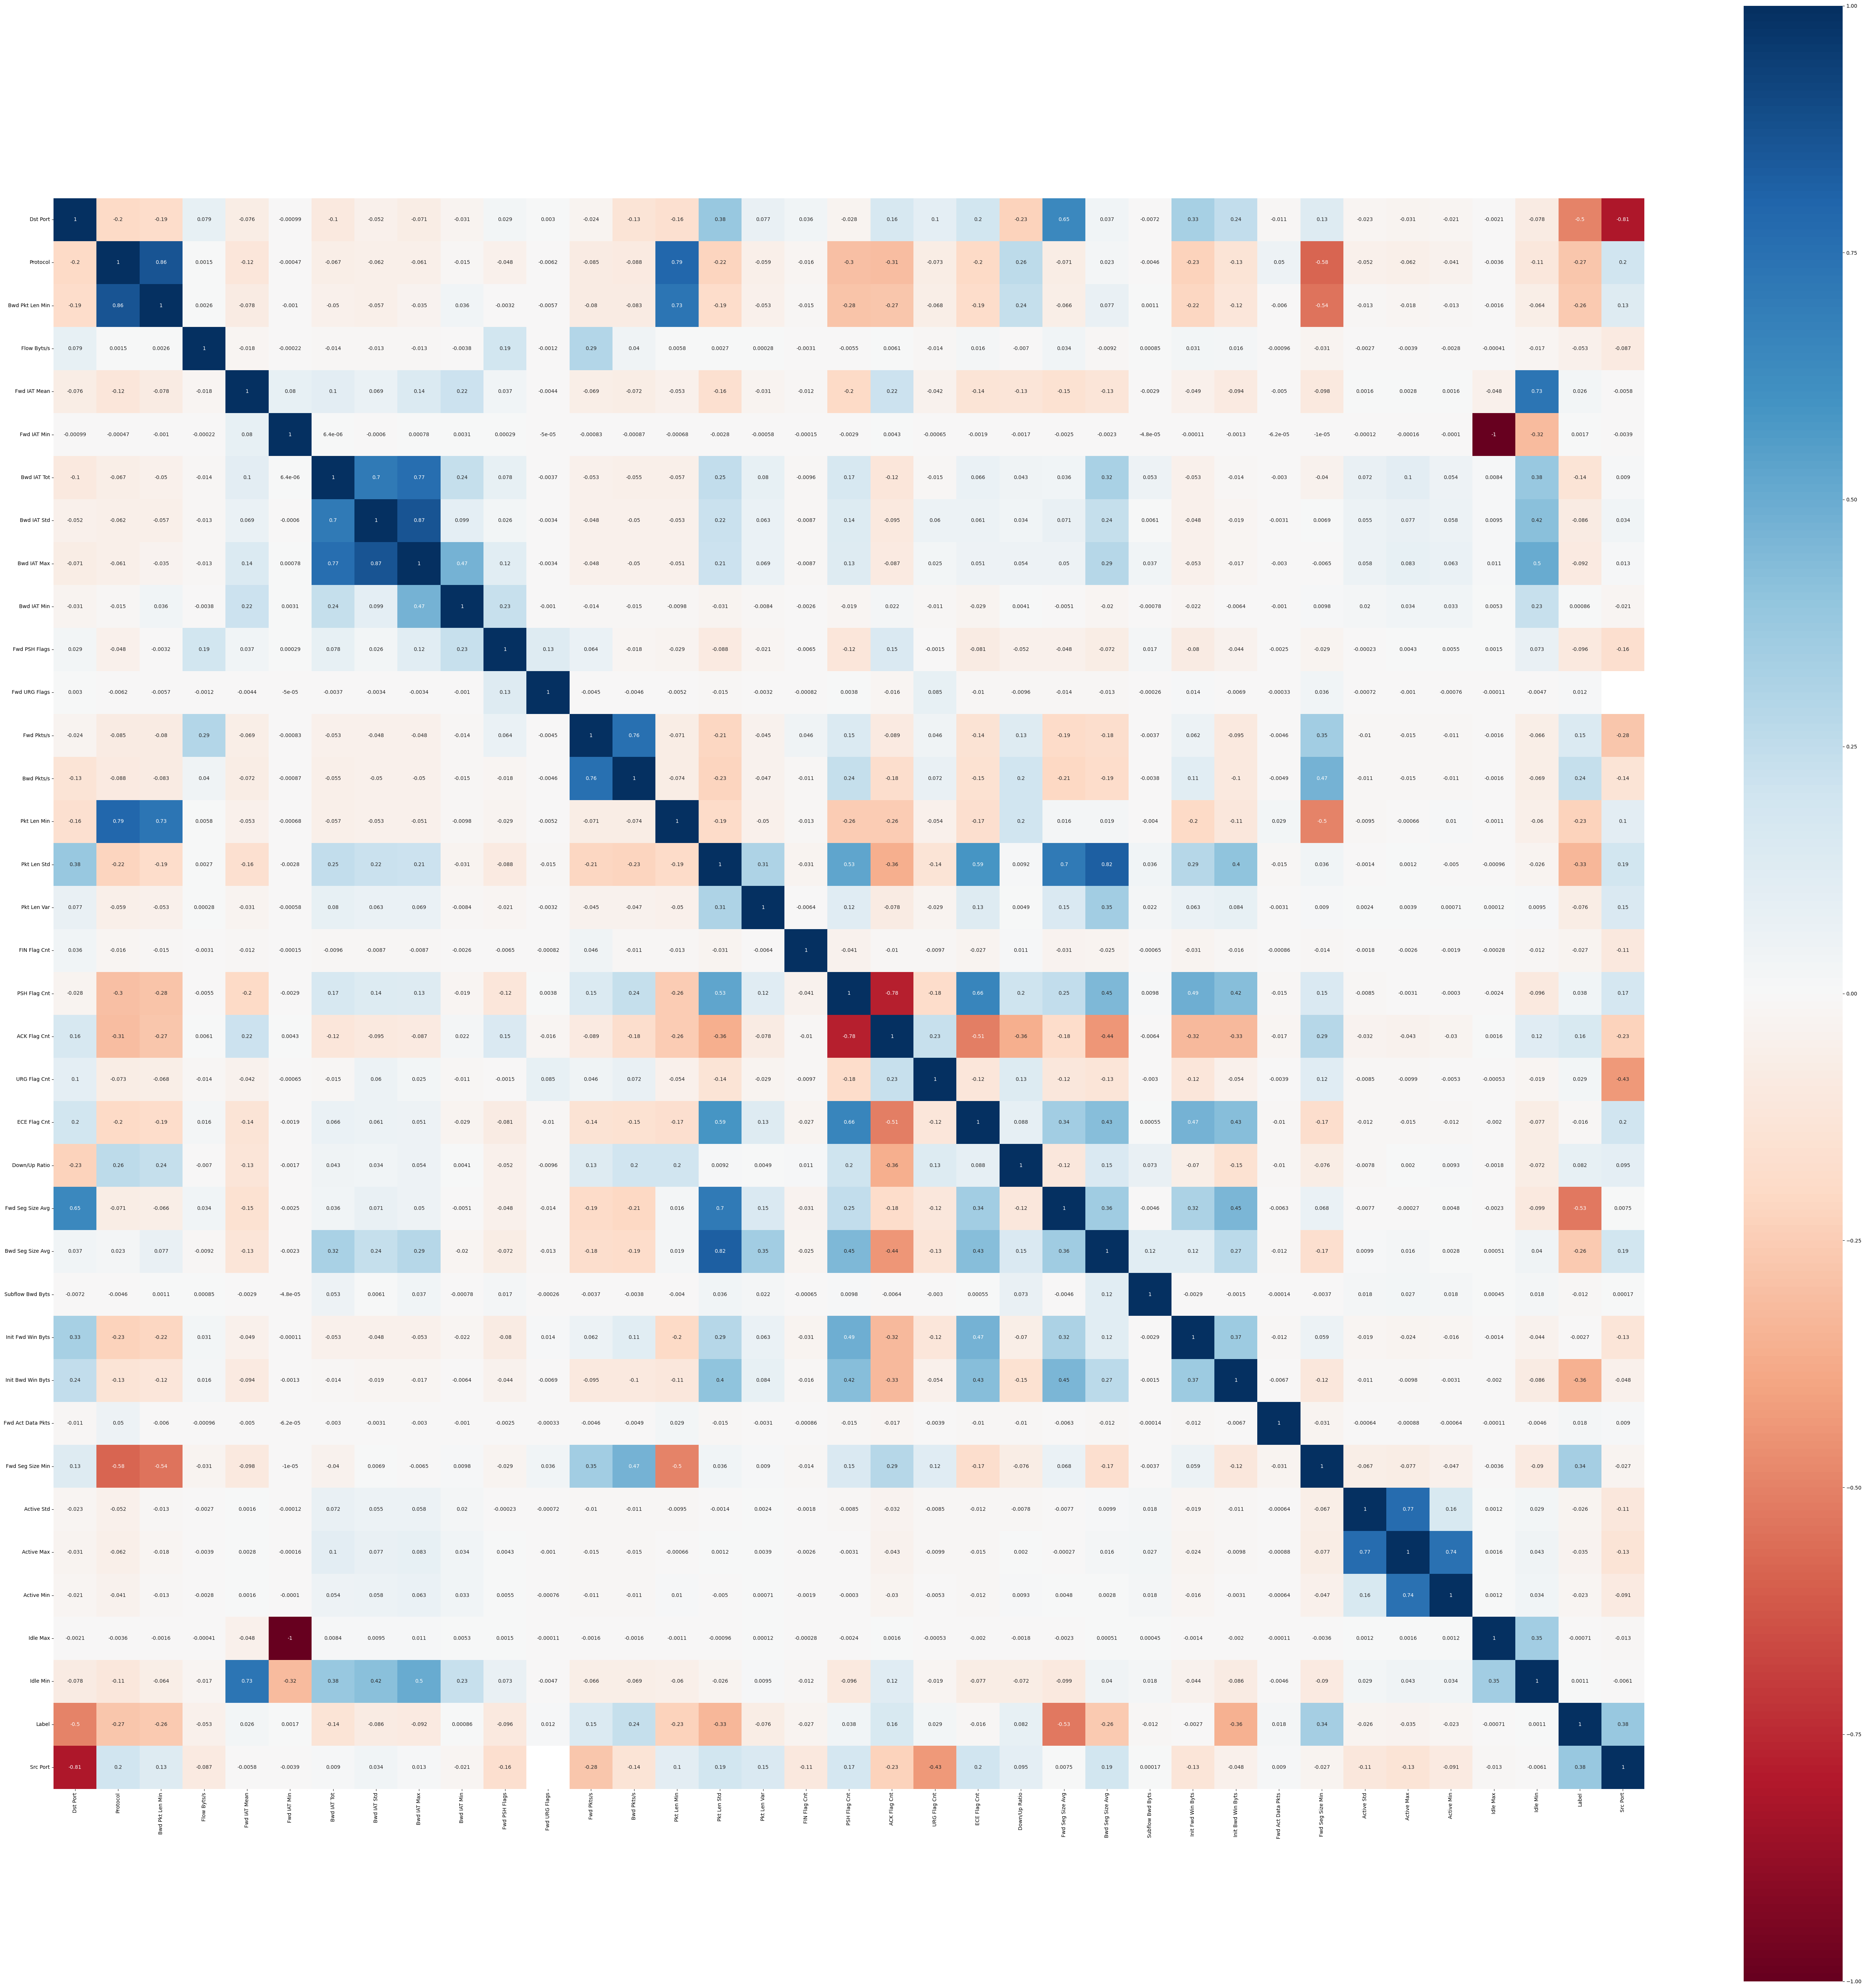

CPU times: total: 14.8 s
Wall time: 15.1 s


In [25]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
%%time
# list numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

['Dst Port', 'Protocol', 'Bwd Pkt Len Min', 'Flow Byts/s', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max', 'Active Min', 'Idle Max', 'Idle Min', 'Label', 'Src Port']
CPU times: total: 703 ms
Wall time: 711 ms


In [ ]:
# numeric_cols
df[numeric_cols]

,Dst Port,Protocol,Bwd Pkt Len Min,Flow Byts/s,Fwd IAT Mean,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,...,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Max,Idle Min,Label,Src Port
0,80,6,0,7.355867,7.676412e+06,166,110380074,3.761331e+06,10034696,1237,...,4868,12,20,24456.106997,111280,30078,10004284,9954805,0,NaN
1,3389,6,0,481.143797,6.738572e+05,4,5822577,9.260852e+05,3010064,63465,...,62856,6,20,0.000000,0,0,0,0,0,NaN
2,443,6,0,161971.830986,1.420000e+02,127,0,0.000000e+00,0,0,...,-1,1,20,0.000000,0,0,0,0,0,NaN
3,53,17,60,353741.496599,0.000000e+00,0,0,0.000000e+00,0,0,...,-1,0,8,0.000000,0,0,0,0,0,NaN
4,80,6,0,852825.229961,2.100000e+02,121,516,1.561442e+02,307,1,...,149,1,20,0.000000,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529985,0,0,0,0.000000,1.054111e+03,41,0,0.000000e+00,0,0,...,-1,0,0,0.000000,0,0,0,0,1,NaN
4529986,51395,6,0,0.000000,3.433530e+05,468,515615,0.000000e+00,515615,515615,...,8192,0,20,0.000000,0,0,0,0,1,NaN
4529987,51397,6,0,0.000000,3.433327e+05,407,515621,0.000000e+00,515621,515621,...,8192,0,20,0.000000,0,0,0,0,1,NaN
4529988,51396,6,0,0.000000,3.433390e+05,415,515643,0.000000e+00,515643,515643,...,8192,0,20,0.000000,0,0,0,0,1,NaN


In [29]:
%%time
# apply z-score normalization
std = StandardScaler()
df[numeric_cols] = std.fit_transform(df[numeric_cols])

CPU times: total: 7.41 s
Wall time: 7.64 s


In [ ]:
df.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

In [33]:
%%time
X=df.drop(["Label"], axis=1)
y=df["Label"]

# split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

# K-fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

CPU times: total: 3.53 s
Wall time: 3.6 s


In [34]:
def confusionMatrixHeatMap(cm, title):
    # box lebels
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # categories
    categories = ['Benign', 'Malicious']

    # create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)

    # create and add rectangle patch
    ax = plt.gca()
    rect = patches.Rectangle((0, 0), len(cm[0]), len(cm), linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # set labels, title, and axis ticks
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    title_font = { 'fontsize': 16, 'fontname': 'Times New Roman' }
#     plt.title('Decision Tree\n', **title_font)
    plt.title(title + '\n', **title_font)

    # calculate accuracy and misclassification rate
    total_samples = len(y)
    correct_predictions = sum(y == y_pred)
    incorrect_predictions = total_samples - correct_predictions
    accuracy = correct_predictions / total_samples
    misclassification_rate = incorrect_predictions / total_samples

    # add accuracy and misclassification rate to the heatmap
    plt.text(0.5, -0.1, f'\n\n\nAccuracy: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, f'\nMisclassification Rate: {misclassification_rate:.4f}', ha='center', va='center', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

Decision Tree
Confusion Matrix:
[[2022850  242145]
 [ 171859 2093136]]
Performance Matrix:
              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.91   2264995
         1.0       0.90      0.92      0.91   2264995

    accuracy                           0.91   4529990
   macro avg       0.91      0.91      0.91   4529990
weighted avg       0.91      0.91      0.91   4529990

AUC: 0.9086081867730392


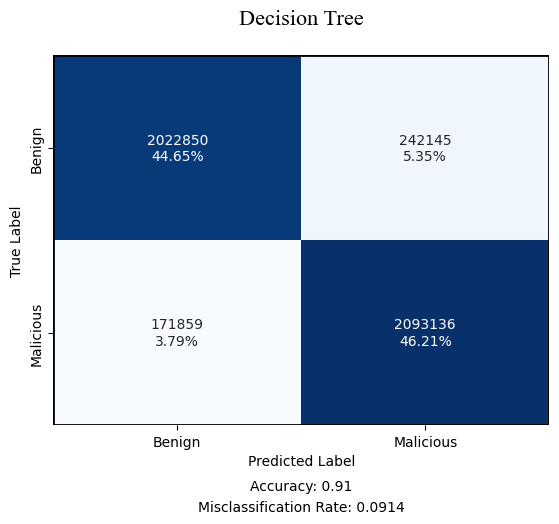

CPU times: total: 2min 51s
Wall time: 2min 53s


In [35]:
%%time
# create a Decision Tree model
dt = DecisionTreeClassifier(max_depth = 3)

# predict
y_pred = cross_val_predict(dt, X, y, cv=kf)


print ("Decision Tree")
# generate report
cm=confusion_matrix(y, y_pred)
cr=classification_report(y, y_pred)
auc = roc_auc_score(y, y_pred)

print("Confusion Matrix:")
print(cm)

print("Performance Matrix:")
print(cr)

print("AUC:", auc)

confusionMatrixHeatMap(cm, title="Decision Tree")

In [39]:
dt.feature_importances_

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [36]:
%%time
# create a Random Forest model
rf = RandomForestClassifier(n_estimators = 10, n_jobs = -1)

# predict
y_pred = cross_val_predict(rf, X, y, cv=kf)

print ("Random Forest")
# generate report
cm=confusion_matrix(y, y_pred)
cr=classification_report(y, y_pred)

print("Confusion Matrix:")
print(cm)

print("Performance Matrix:")
print(cr)

Random Forest
Confusion Matrix:
[[2218067   46928]
 [ 112140 2152855]]
Performance Matrix:
              precision    recall  f1-score   support

        -1.0       0.95      0.98      0.97   2264995
         1.0       0.98      0.95      0.96   2264995

    accuracy                           0.96   4529990
   macro avg       0.97      0.96      0.96   4529990
weighted avg       0.97      0.96      0.96   4529990

CPU times: total: 21min 53s
Wall time: 2min 46s


In [37]:
y_xg = y.replace({-1: 0, 1: 1})

y_xg.value_counts()

Label
0.0    2264995
1.0    2264995
Name: count, dtype: int64

In [38]:
%%time
# create a XGBoost model
xgb = XGBClassifier()

# predict
y_pred = cross_val_predict(xgb, X, y_xg, cv=kf)

print ("XGBoost")
# generate report
print("Confusion Matrix:")
print(confusion_matrix(y_xg, y_pred))

print("Performance Matrix:")
print(classification_report(y_xg, y_pred))

XGBoost
Confusion Matrix:
[[2249164   15831]
 [ 117129 2147866]]
Performance Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97   2264995
         1.0       0.99      0.95      0.97   2264995

    accuracy                           0.97   4529990
   macro avg       0.97      0.97      0.97   4529990
weighted avg       0.97      0.97      0.97   4529990

CPU times: total: 21min 27s
Wall time: 1min 49s
